### Week 5

In [1]:
import numpy as np
from sklearn.datasets import make_classification

In [2]:
X, y = make_classification()

In [3]:
point = X[0]

In [5]:
np.apply_along_axis(np.linalg.norm, 1, X-point)

array([0.        , 5.97009271, 6.39131448, 6.81968802, 5.2003074 ,
       7.01898486, 7.25043881, 6.17876981, 6.72103499, 4.79974191,
       4.95294757, 5.02580147, 5.5325675 , 5.87124245, 5.40443457,
       5.00095929, 6.93868876, 4.62971667, 5.78926975, 6.26582441,
       5.80451628, 5.40802177, 6.12602115, 5.60392327, 4.58441764,
       6.82391457, 6.51255359, 5.92727105, 4.18522994, 6.38702741,
       6.13469972, 6.95223318, 4.97760037, 4.26201949, 7.321678  ,
       5.71961724, 5.3967366 , 5.60843894, 4.01795699, 5.66016073,
       5.22353396, 5.51820067, 5.31515956, 5.08511576, 3.89124163,
       5.27442873, 6.53224526, 6.55464946, 7.69790444, 6.71390968,
       6.73426053, 4.80386819, 6.9497397 , 5.8904484 , 5.30894661,
       6.24997775, 5.51999132, 5.41486243, 3.24965443, 6.00521109,
       5.06923951, 6.11841585, 5.84554996, 6.43150167, 7.1265605 ,
       4.67360738, 4.92039635, 5.73792876, 5.53455087, 4.05432297,
       4.73424276, 5.01569102, 5.94602377, 5.83421719, 5.74515

In [8]:
import pandas as pd

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [27]:
def custom_KNN(X, y, n):
    dists = np.apply_along_axis(np.linalg.norm, 1, X-point)
    df = pd.DataFrame({'dist': dists, 'label': y})
    ans = df.sort_values(by = 'dist')
    ans = Counter(ans['label'].head(n))
    return ans.most_common(1)[0][0]

In [28]:
custom_KNN(X, y, n=5)

1

In [13]:
from collections import Counter

In [14]:
ans = custom_KNN(X, y).sort_values(by = 'dist')

In [18]:
ans = Counter(ans['label'].head(5))

In [22]:
ans.most_common(1)[0][0]

1

In [29]:
preds = custom_KNN(X, y, 5)

In [30]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
knn = KNeighborsClassifier()

In [32]:
knn.fit(X, y)

KNeighborsClassifier()

In [33]:
knn.score(X, y)

0.89

In [34]:
preds = knn.predict(X)

In [35]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

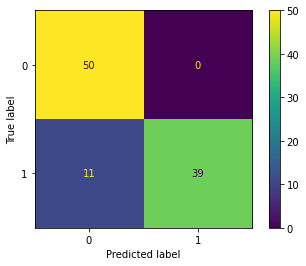

In [37]:
plot_confusion_matrix(knn, X, y)

In [38]:
from sklearn.datasets import load_breast_cancer

In [41]:
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

In [42]:
X.shape

(569, 30)

In [43]:
y.shape

(569,)

In [44]:
knn.fit(X, y)

KNeighborsClassifier()

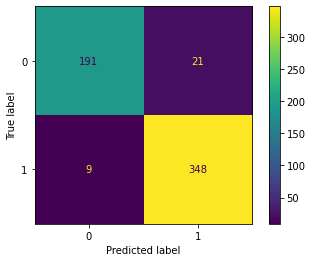

In [45]:
plot_confusion_matrix(knn, X, y)

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
lgr = LogisticRegression()

In [48]:
lgr.fit(X, y)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [49]:
lgr.score(X, y)

0.9472759226713533

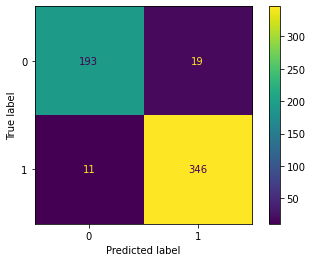

In [50]:
plot_confusion_matrix(lgr, X, y)

In [52]:
probs = lgr.predict_proba(X)
probs

array([[1.00000000e+00, 5.16863017e-15],
       [9.99999965e-01, 3.50130146e-08],
       [9.99999729e-01, 2.71002279e-07],
       ...,
       [9.92324754e-01, 7.67524615e-03],
       [1.00000000e+00, 1.94976140e-10],
       [2.53589455e-02, 9.74641054e-01]])

In [55]:
new_preds = np.where(probs[:, 1] > 0.7, 1, 0)

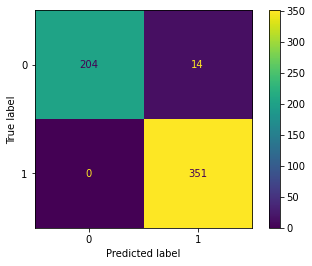

In [56]:
plot_confusion_matrix(lgr, X, new_preds)

In [57]:
# recall = tp/(tp + fn)
# precision = tp/(tp + fp)

In [58]:
from sklearn.preprocessing import StandardScaler

In [59]:
sscaler = StandardScaler()
Xs = sscaler.fit_transform(X)

In [61]:
lgr = LogisticRegression()

In [63]:
lgr.fit(Xs, y)

LogisticRegression()

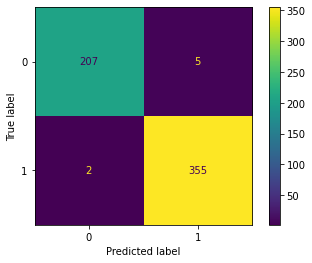

In [64]:
plot_confusion_matrix(lgr, Xs, y)

In [65]:
import statsmodels.api as sm

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [66]:
from statsmodels.discrete.discrete_model import Logit

In [70]:
X, y = cancer.data, cancer.target

In [72]:
logit = Logit(y, X[:, :2]).fit()

Optimization terminated successfully.
         Current function value: 0.631058
         Iterations 5


In [73]:
logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  569
Model:                          Logit   Df Residuals:                      567
Method:                           MLE   Df Model:                            1
Date:                Fri, 16 Oct 2020   Pseudo R-squ.:                 0.04431
Time:                        10:06:03   Log-Likelihood:                -359.07
converged:                       True   LL-Null:                       -375.72
Covariance Type:            nonrobust   LLR p-value:                 7.915e-09
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.1810      0.026     -6.855      0.000      -0.233      -0.129
x2             0.1475      0.020      7.408      0.000       0.109       0.187
==============================================================================
"""

In [74]:
log2 = Logit(y, X[:, :2])